In [438]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import random
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-1/FoDS/insurance_dataset.csv'
ds = pd.read_csv(filename)
ds = ds.drop(['children'], axis = 1)
ds = ds.to_numpy()

In [352]:
def dataset(ds, degree):    
    np.random.shuffle(ds)
    y = ds[:, -1]
    y = np.reshape(y, (1338, 1))
    x = ds[:, 0:2]
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    data = np.hstack((x_poly, y))
    return data

In [353]:
def standardize(degree):
    data = dataset(ds, degree)
    bias = data[:, 0]
    bias = np.reshape(bias, (1338, 1))
    feature = data[:, 1:]
    mu = np.mean(feature, axis = 0)
    sigma = np.std(feature, axis = 0)
    feature = (feature - mu)/sigma
    data = np.hstack((bias, feature))
    return data

In [375]:
def gradientD(degree, lambd, d, iterations, val):
    data = standardize(degree)
    train_count = int(0.7*len(data))
    valid_count = int(0.9*len(data))
    x = data[:train_count, :-1]
    y = data[:train_count, -1]
    learn_rate = 0.00001
    costs = []
    w = np.zeros(len(x[0]))
    
    if(d == 0):            #polynomial regression
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*delE

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 1):            #ridge refresion
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + 2*lambd*w)

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))

        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))

        return w, cost_valid, cost_test
    
    if(d == 2):            #lasso refression
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + lambd*np.sign(w))

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test

In [376]:
def stochasticGD(degree, lambd, d, iterations, val):
    data = standardize(degree)
    train_count = int(0.7*len(data))
    valid_count = int(0.9*len(data))
    x = data[:train_count, :-1]
    y = data[:train_count, -1]
    learn_rate = 0.00001
    costs = []
    w = np.zeros(len(x[0]))
    
    if(d == 0):            #polynomial regression
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*delE

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 1):            #ridge refresion
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + 2*lambd*w)

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 2):            #lasso refresion
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + lambd*np.sign(w))

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test

In [377]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in degrees:
    print('Training and testing error in polynomial regression for degree {}'.format(i))
    print()
    gradientD(i, 0, 0, 500, True)
    print('------------------------------------------------')

Training and testing error in polynomial regression for degree 1

0 : 0.5033436360968602
50 : 0.4649324613975757
100 : 0.45102499643379684
150 : 0.44597344824237645
200 : 0.44413215055699606
250 : 0.44345841986632034
300 : 0.4432108763454911
350 : 0.4431195162006062
400 : 0.44308563706387677
450 : 0.443073010130652

The validation error is : 0.44856626562700924

The testing error is : 0.41567890314309514
------------------------------------------------
Training and testing error in polynomial regression for degree 2

0 : 0.5038098310346737
50 : 0.44532950922157505
100 : 0.44247365699209873
150 : 0.4422846918469507
200 : 0.442230817688089
250 : 0.4421865640068311
300 : 0.4421443866178574
350 : 0.44210339052298064
400 : 0.44206333045227925
450 : 0.4420241089845499

The validation error is : 0.40685365541443036

The testing error is : 0.507996046702351
------------------------------------------------
Training and testing error in polynomial regression for degree 3

0 : 0.49507814785390747

In [378]:
for i in degrees:
    print('Training and testing error in polynomial regression for degree {}'.format(i))
    print()
    stochasticGD(i, 0, 0, 500, True)
    print('------------------------------------------------')

Training and testing error in polynomial regression for degree 1

0 : 0.5044983841603434
50 : 0.5043746287131678
100 : 0.5042927925695472
150 : 0.5041980583845148
200 : 0.5041265209650352
250 : 0.5040365518499843
300 : 0.5039952123541039
350 : 0.5039139802558927
400 : 0.5038492642418357
450 : 0.5037953995257645

The validation error is : 0.5445061235194476

The testing error is : 0.37766628593795004
------------------------------------------------
Training and testing error in polynomial regression for degree 2

0 : 0.49808810348525256
50 : 0.49784867238892544
100 : 0.49773701170708967
150 : 0.4976045770612603
200 : 0.497446893094219
250 : 0.49720434687358495
300 : 0.4970399532103083
350 : 0.49686803206094815
400 : 0.49666837607853404
450 : 0.4966237435705365

The validation error is : 0.5022009100825059

The testing error is : 0.5043201471811455
------------------------------------------------
Training and testing error in polynomial regression for degree 3

0 : 0.48885913453593194
50

In [390]:
w, valid_error, test_error, stor_r = [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)]
for j in range(1,3):
    for i in degrees:
        for k in range(10):
            r = random.uniform(0, 1)
            if(j == 1):    
                print('Training, validation and testing error in ridge regression for degree {} and regularisation parameter {}'.format(i, r))
            if(j == 2):    
                print('Training, validation and testing error in lasso regression for degree {} and regularisation parameter {}'.format(i, r))
            print()
            w[j-1][i-1][k], valid_error[j-1][i-1][k], test_error[j-1][i-1][k] = gradientD(i, r, j, 500, True)
            stor_r[j-1][i-1][k] = r
            print('------------------------------------------------')

Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.2347957138130885

0 : 0.5225394626655274
50 : 0.48691154320363506
100 : 0.4741093688260524
150 : 0.4694975934389256
200 : 0.46783134579171287
250 : 0.4672271863590901
300 : 0.46700717599407265
350 : 0.46692662310909555
400 : 0.46689692531585897
450 : 0.4668858764907877

The validation error is : 0.3740065974575776

The testing error is : 0.4014256350815976
------------------------------------------------
Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.09439246708764037

0 : 0.48810026282057856
50 : 0.4561871052416624
100 : 0.4449366238564623
150 : 0.44096055588668553
200 : 0.43955117112975706
250 : 0.43904980642537256
300 : 0.4388706890744197
350 : 0.4388063660288525
400 : 0.43878312117310647
450 : 0.43877465580839964

The validation error is : 0.464998159176482

The testing error is : 0.41827110002987455
-------------------------

350 : 0.45466429282805243
400 : 0.45464875831258394
450 : 0.4546337796688972

The validation error is : 0.4606343568435495

The testing error is : 0.31989701251009556
------------------------------------------------
Training, validation and testing error in ridge regression for degree 2 and regularisation parameter 0.07227174575740991

0 : 0.5086605963685257
50 : 0.45908236459932156
100 : 0.45656029137595194
150 : 0.4563759774992367
200 : 0.4563112385706752
250 : 0.45625400214580886
300 : 0.4561981846080851
350 : 0.45614335021683183
400 : 0.45608943103066535
450 : 0.456036398980788

The validation error is : 0.3991241608297748

The testing error is : 0.4319776483990025
------------------------------------------------
Training, validation and testing error in ridge regression for degree 2 and regularisation parameter 0.21099682444700074

0 : 0.47911793552361764
50 : 0.42176032346893727
100 : 0.4186597212366562
150 : 0.4184573905338565
200 : 0.4184326126419827
250 : 0.41842294997533314
3

200 : 0.4585163168045268
250 : 0.45824612923820396
300 : 0.45800110794745374
350 : 0.4577785939904312
400 : 0.4575763334111581
450 : 0.4573923521046793

The validation error is : 0.4339494707639814

The testing error is : 0.3524023438445242
------------------------------------------------
Training, validation and testing error in ridge regression for degree 4 and regularisation parameter 0.43633400075423834

0 : 0.507395654385618
50 : 0.4441519209515364
100 : 0.44401526130536806
150 : 0.4439015400962978
200 : 0.44379939391857065
250 : 0.44370648696801185
300 : 0.443621496148623
350 : 0.44354351955061955
400 : 0.4434718569469117
450 : 0.4434059204713596

The validation error is : 0.4617927627829958

The testing error is : 0.39898268047186547
------------------------------------------------
Training, validation and testing error in ridge regression for degree 4 and regularisation parameter 0.06644469070491898

0 : 0.49720995644766064
50 : 0.44093137121198456
100 : 0.44037118883704907
150

250 : 0.4405244606331208
300 : 0.4401986273043285
350 : 0.43997198661029063
400 : 0.4398137551736539
450 : 0.4397027839767248

The validation error is : 0.45743866317206927

The testing error is : 0.41463580408062367
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.8170863416169705

0 : 0.5000035341488626
50 : 0.4454257003465577
100 : 0.44474991187894464
150 : 0.4442724712890006
200 : 0.4439320224347989
250 : 0.4436875262456
300 : 0.4435105966102883
350 : 0.4433814626752926
400 : 0.4432862761419037
450 : 0.44321529104878843

The validation error is : 0.4093240062102797

The testing error is : 0.49423161627220163
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.7083222072161002

0 : 0.46130869745597286
50 : 0.4127154768741904
100 : 0.41109883854352564
150 : 0.41003995194697435
200 : 0

400 : 0.472221962783859
450 : 0.4721519671175642

The validation error is : 0.38192785391091805

The testing error is : 0.34081290690555643
------------------------------------------------
Training, validation and testing error in ridge regression for degree 7 and regularisation parameter 0.6494476836414318

0 : 0.4793388841766368
50 : 0.4262089459619592
100 : 0.4237486541706908
150 : 0.42236462733987873
200 : 0.4215757021993301
250 : 0.4211183740694829
300 : 0.42084718869906823
350 : 0.42068131949351806
400 : 0.42057556624756487
450 : 0.4205044938633956

The validation error is : 0.4751475194501422

The testing error is : 0.5076486883611834
------------------------------------------------
Training, validation and testing error in ridge regression for degree 8 and regularisation parameter 0.09794691730773442

0 : 0.5388555904996152
50 : 0.4863865243969615
100 : 0.48337972059145956
150 : 0.48197556965576294
200 : 0.48130532707854956
250 : 0.4809745371690477
300 : 0.4808024651387022
350 

250 : 0.43593305316520664
300 : 0.43590397423278343
350 : 0.43588620160281305
400 : 0.43587259339212725
450 : 0.435860831863398

The validation error is : 0.4497518791030497

The testing error is : 0.45498391456221854
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.47586100184817903

0 : 0.4634028031280604
50 : 0.41343727189494156
100 : 0.41151061999062394
150 : 0.4108722664363553
200 : 0.4106370814378315
250 : 0.41053245874250094
300 : 0.41047183007421084
350 : 0.41042700577863744
400 : 0.41038856830979414
450 : 0.41035325775642595

The validation error is : 0.5531925104890966

The testing error is : 0.43242735724704495
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.885981261386256

0 : 0.5120206227852184
50 : 0.4566058089355915
100 : 0.4523604401759178
150 : 0.4506250086685996
2

0 : 0.4936403268221316
50 : 0.4536602011703784
100 : 0.43941587680257665
150 : 0.43433316876196565
200 : 0.4325161734452703
250 : 0.43186508487977
300 : 0.4316310529376866
350 : 0.4315465771796286
400 : 0.43151590705681936
450 : 0.43150467974352047

The validation error is : 0.4298709468893753

The testing error is : 0.534358008461829
------------------------------------------------
Training, validation and testing error in lasso regression for degree 1 and regularisation parameter 0.10168029617963947

0 : 0.48007770038099873
50 : 0.44555818873661124
100 : 0.43290942255482207
150 : 0.4282645377826831
200 : 0.42655444046253743
250 : 0.42592287792142985
300 : 0.42568874656761213
350 : 0.4256015410855931
400 : 0.4255688674428659
450 : 0.425556532417348

The validation error is : 0.513845730528074

The testing error is : 0.41170685592210776
------------------------------------------------
Training, validation and testing error in lasso regression for degree 1 and regularisation parameter 0

150 : 0.4605631192622977
200 : 0.4605000344456524
250 : 0.4604405898241201
300 : 0.46038418225285016
350 : 0.46033048941166227
400 : 0.46027930132357736
450 : 0.4602304584088681

The validation error is : 0.41784458255177465

The testing error is : 0.36483714937531114
------------------------------------------------
Training, validation and testing error in lasso regression for degree 3 and regularisation parameter 0.015085091340944823

0 : 0.48721077611440666
50 : 0.42602876380665855
100 : 0.4257030854140758
150 : 0.42561480885781194
200 : 0.4255381091865014
250 : 0.42546711013036403
300 : 0.425399798660278
350 : 0.4253353376344807
400 : 0.42527334682747464
450 : 0.4252136265015189

The validation error is : 0.485952180002063

The testing error is : 0.47407428799670787
------------------------------------------------
Training, validation and testing error in lasso regression for degree 3 and regularisation parameter 0.9382064070358502

0 : 0.5098354624331747
50 : 0.4485125420571993
10

350 : 0.44264238065235983
400 : 0.44251158310389443
450 : 0.4423970986037438

The validation error is : 0.4558591115078414

The testing error is : 0.4138858867467765
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.9071798784185576

0 : 0.48395316044669323
50 : 0.4302526211415683
100 : 0.4296832692027034
150 : 0.4292289035959858
200 : 0.4288286483194104
250 : 0.4284737949294067
300 : 0.42815149852238793
350 : 0.4278579157048374
400 : 0.4275899859919616
450 : 0.4273451246112557

The validation error is : 0.4281589939799152

The testing error is : 0.5757837412521518
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.3891492964577705

0 : 0.474077793419789
50 : 0.41777943407956936
100 : 0.4173113290999993
150 : 0.4169785695325554
200 : 0.41670916387958223
250 : 0.4164859241012178
300 : 0.

250 : 0.467159287234237
300 : 0.4668550571726285
350 : 0.4666499137673366
400 : 0.46651046683004394
450 : 0.46641491785463635

The validation error is : 0.386591886021271

The testing error is : 0.37976673475741113
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.6592113779065488

0 : 0.4746801848854848
50 : 0.41945573645708145
100 : 0.41767785678352903
150 : 0.41649539530469776
200 : 0.4156926868590111
250 : 0.4151387899686558
300 : 0.41475267125769505
350 : 0.4144802392723382
400 : 0.41428616862248185
450 : 0.4141464476272457

The validation error is : 0.4979588764856143

The testing error is : 0.5138623949001808
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.5885496088685502

0 : 0.4949034304893581
50 : 0.4403560037549672
100 : 0.43925308589470147
150 : 0.43848327080433425
200 :

50 : 0.44023464994934514
100 : 0.43788781099030616
150 : 0.4367893936624206
200 : 0.43625800639274337
250 : 0.4359889203682368
300 : 0.43584370782082
350 : 0.4357583216308783
400 : 0.43570283240573027
450 : 0.4356629260735702

The validation error is : 0.4619513084817808

The testing error is : 0.43096715419827125
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0.15401843401110826

0 : 0.4893480007039473
50 : 0.4416604452839813
100 : 0.43884272043071615
150 : 0.43767205840869006
200 : 0.43716689215863047
250 : 0.43693916227598734
300 : 0.4368295625606002
350 : 0.43677154344237884
400 : 0.4367367280248925
450 : 0.43671275153953215

The validation error is : 0.45785667066273433

The testing error is : 0.4439452466199014
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0.5842640844653605



250 : 0.45008533437328324
300 : 0.45002292644382363
350 : 0.44998823402109955
400 : 0.44996374658454763
450 : 0.44994335625977927

The validation error is : 0.3765796065849251

The testing error is : 0.5083017299356491
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.9291934420952573

0 : 0.5268060475755517
50 : 0.46787624817147105
100 : 0.46520442386194616
150 : 0.464329620163899
200 : 0.4640163446185059
250 : 0.46388799010884774
300 : 0.4638246072944588
350 : 0.46378569082199117
400 : 0.4637583287766145
450 : 0.4637358073079211

The validation error is : 0.41709741928198346

The testing error is : 0.3268588375926588
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.830386358932964

0 : 0.5104708102493803
50 : 0.465874913609432
100 : 0.4629844918117232
150 : 0.4620167272671607
200 : 

In [436]:
print('Ridge Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[0][i-1]), stor_r[0][i-1][np.where(valid_error[0][i-1] == min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')
print('Lasso Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[1][i-1]), stor_r[1][i-1][np.where(valid_error[1][i-1] == min(valid_error[1][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')

Ridge Regression
..............................
Degree 1
The minimum validation error obtained is 0.44519449231900693 for regularisation parameter [0.56095529]
The corresponding testing error is 0.40752659279247716
--------------------------------------------------------------------------------------------------------------
Degree 2
The minimum validation error obtained is 0.4273279993545966 for regularisation parameter [0.49475917]
The corresponding testing error is 0.37448759144003896
--------------------------------------------------------------------------------------------------------------
Degree 3
The minimum validation error obtained is 0.4158639881156804 for regularisation parameter [0.4086513]
The corresponding testing error is 0.40089349545736097
--------------------------------------------------------------------------------------------------------------
Degree 4
The minimum validation error obtained is 0.379390392143504 for regularisation parameter [0.66666247]
The corresp

In [434]:
for j in range(1,3):
    for i in degrees:
        for k in range(10):
            r = random.uniform(0, 1)
            if(j == 1):    
                print('Training, validation and testing error in ridge regression for degree {} and regularisation parameter {}'.format(i, r))
            if(j == 2):    
                print('Training, validation and testing error in lasso regression for degree {} and regularisation parameter {}'.format(i, r))
            print()
            w[j-1][i-1][k], valid_error[j-1][i-1][k], test_error[j-1][i-1][k] = stochasticGD(i, r, j, 500, True)
            stor_r[j-1][i-1][k] = r
            print('------------------------------------------------')

Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.7626458519123436

0 : 0.5122290754062212
50 : 0.5121765064748874
100 : 0.5120729565148127
150 : 0.5119642589300346
200 : 0.5119183761091434
250 : 0.5117704688022323
300 : 0.5116731945223836
350 : 0.5115859244812715
400 : 0.5115700781493587
450 : 0.5114437870255054

The validation error is : 0.500372724897465

The testing error is : 0.41114594160021434
------------------------------------------------
Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.710007165644933

0 : 0.5009187429773607
50 : 0.5008444475518515
100 : 0.5007945587216005
150 : 0.5007132197025018
200 : 0.5007222351018741
250 : 0.5006896618680076
300 : 0.500624329546991
350 : 0.50054421983698
400 : 0.5005282658436372
450 : 0.5004217131759602

The validation error is : 0.48333327386186364

The testing error is : 0.5253196559125568
----------------------------------------

200 : 0.47273955321023775
250 : 0.47237070805754594
300 : 0.47208703007725566
350 : 0.4719957255901692
400 : 0.4717113133742739
450 : 0.47163135452452504

The validation error is : 0.5371991948059385

The testing error is : 0.59658986923533
------------------------------------------------
Training, validation and testing error in ridge regression for degree 3 and regularisation parameter 0.991126196708189

0 : 0.516682317076225
50 : 0.5161917175897119
100 : 0.5153876064613677
150 : 0.5151453965645311
200 : 0.5147826717539465
250 : 0.5144188132836526
300 : 0.5141803055520477
350 : 0.513785870071836
400 : 0.513251479181251
450 : 0.5126973657217112

The validation error is : 0.4864386332315896

The testing error is : 0.40089349545736097
------------------------------------------------
Training, validation and testing error in ridge regression for degree 3 and regularisation parameter 0.9794068132238447

0 : 0.4930588699242156
50 : 0.49281263323983077
100 : 0.49276524707364056
150 : 0.4925


The testing error is : 0.5178358807388846
------------------------------------------------
Training, validation and testing error in ridge regression for degree 5 and regularisation parameter 0.23177336211038846

0 : 0.5046525899687909
50 : 0.5027332545140422
100 : 0.5019600252501801
150 : 0.5008312960138519
200 : 0.500111192228583
250 : 0.49988677425129086
300 : 0.4988716008690968
350 : 0.49856567925505646
400 : 0.49833670953964704
450 : 0.4978533553297803

The validation error is : 0.5179352651281302

The testing error is : 0.41628672051139487
------------------------------------------------
Training, validation and testing error in ridge regression for degree 5 and regularisation parameter 0.8411181009547143

0 : 0.47192031904150544
50 : 0.4710735420035385
100 : 0.46999381202424156
150 : 0.46924593605466597
200 : 0.46877715783689583
250 : 0.46830657127466546
300 : 0.4680047549538899
350 : 0.4672585394173604
400 : 0.4663113755225749
450 : 0.46587719246304077

The validation error is

450 : 0.4909640647982672

The validation error is : 0.5101733575020948

The testing error is : 0.446038178714699
------------------------------------------------
Training, validation and testing error in ridge regression for degree 7 and regularisation parameter 0.7750371612239697

0 : 0.5120106453901192
50 : 0.510531476995045
100 : 0.5090691904026939
150 : 0.5085184932128295
200 : 0.5069181701455533
250 : 0.5053114999092684
300 : 0.5037619392320422
350 : 0.5025325527408473
400 : 0.5018014886171535
450 : 0.5004887024285404

The validation error is : 0.48221446817144953

The testing error is : 0.4161251195209036
------------------------------------------------
Training, validation and testing error in ridge regression for degree 7 and regularisation parameter 0.3632391540937898

0 : 0.49103722211895356
50 : 0.4903225656784039
100 : 0.4894292045447691
150 : 0.4892778277705976
200 : 0.4876137051825195
250 : 0.48658925755576415
300 : 0.48536821545870434
350 : 0.48435955476320747
400 : 0.48

400 : 0.4690268848002819
450 : 0.46726398945377

The validation error is : 0.48319511935167797

The testing error is : 0.6431962260709333
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.3451392372663382

0 : 0.5013650022682024
50 : 0.5003395683986099
100 : 0.49944021984599973
150 : 0.4988048673557955
200 : 0.4987127006862364
250 : 0.4952800755178505
300 : 0.4947065814255695
350 : 0.49406581181274845
400 : 0.4926013906652528
450 : 0.4914181105739457

The validation error is : 0.48399651574819186

The testing error is : 0.4866759424420103
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.01961260609634674

0 : 0.5230554015682186
50 : 0.5213859042973529
100 : 0.5193050724563458
150 : 0.5173539453200673
200 : 0.5135301439806226
250 : 0.5123252977073293
300 : 0.5108768222840329
350 : 0.50

350 : 0.4603077608047552
400 : 0.45671261258144114
450 : 0.45669856996195496

The validation error is : 0.5122714730984652

The testing error is : 0.6271123126725334
------------------------------------------------
Training, validation and testing error in ridge regression for degree 10 and regularisation parameter 0.841430690271184

0 : 0.4944631903145841
50 : 0.49390875537029255
100 : 0.4926037872287399
150 : 0.48859716949501
200 : 0.48731334033776047
250 : 0.48509466484608715
300 : 0.4834916353677451
350 : 0.48339237146728853
400 : 0.48328515188689714
450 : 0.48133074445570523

The validation error is : 0.4843423800760283

The testing error is : 0.5260726971436489
------------------------------------------------
Training, validation and testing error in lasso regression for degree 1 and regularisation parameter 0.10186479355105849

0 : 0.47734354979165566
50 : 0.4772694121926061
100 : 0.4772222489469401
150 : 0.47721722883415973
200 : 0.47721921116624283
250 : 0.47716832783865487
30

400 : 0.4926601901485311
450 : 0.4926624805771016

The validation error is : 0.5664506115088667

The testing error is : 0.4181910732308373
------------------------------------------------
Training, validation and testing error in lasso regression for degree 2 and regularisation parameter 0.26729462852085595

0 : 0.5031015643899506
50 : 0.502979168576192
100 : 0.5030305153167838
150 : 0.5030205253389483
200 : 0.5030031871577108
250 : 0.5029265098121903
300 : 0.5029220725154102
350 : 0.5029379060090333
400 : 0.5028667731461539
450 : 0.5028401990134417

The validation error is : 0.5134639258410715

The testing error is : 0.45095806112740455
------------------------------------------------
Training, validation and testing error in lasso regression for degree 2 and regularisation parameter 0.5988883504762554

0 : 0.5001933872657208
50 : 0.5001925992102156
100 : 0.5001810231645855
150 : 0.5001711299055146
200 : 0.500110743795544
250 : 0.5001590821847243
300 : 0.5001820382248222
350 : 0.50019

50 : 0.48238942881376723
100 : 0.4824209375184087
150 : 0.48235223586635667
200 : 0.4823357914718471
250 : 0.48235247240159357
300 : 0.4823761897086361
350 : 0.48237486369426946
400 : 0.48237168617304754
450 : 0.4823902360342573

The validation error is : 0.5273895242320514

The testing error is : 0.5681172576150356
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.2474483124891289

0 : 0.516164878796443
50 : 0.5157353085517106
100 : 0.5151508964893042
150 : 0.5148038986357835
200 : 0.5147187144886001
250 : 0.5146519778711359
300 : 0.5145906043398254
350 : 0.5146784678746125
400 : 0.5146606716707087
450 : 0.5140468995342661

The validation error is : 0.4612425507955479

The testing error is : 0.4590531509968117
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.11566358888813388

0 : 0.

150 : 0.5239386084909549
200 : 0.5241242161900037
250 : 0.5239491377264607
300 : 0.5239790555840386
350 : 0.5240396889592626
400 : 0.5240763507551041
450 : 0.5237912503590507

The validation error is : 0.4258847873616503

The testing error is : 0.47818451430488607
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.46279773288799997

0 : 0.48239329805840053
50 : 0.4823185791251481
100 : 0.4818758208715257
150 : 0.4823639511247206
200 : 0.4821253800362706
250 : 0.48214288424303803
300 : 0.4814651797700745
350 : 0.48143769863225383
400 : 0.4816915272003851
450 : 0.4823492859400097

The validation error is : 0.5755669235366359

The testing error is : 0.4717122429413818
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.8227170933407385

0 : 0.5154196207347078
50 : 0.51547494029221
100 : 0.51

200 : 0.5182811586698076
250 : 0.5198814262323629
300 : 0.519871003702574
350 : 0.5199640292219098
400 : 0.5198372637720255
450 : 0.5191777035697612

The validation error is : 0.4627285080578463

The testing error is : 0.43559992445933404
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0.5329922122893379

0 : 0.509364780507671
50 : 0.5093396334156286
100 : 0.5093201144239305
150 : 0.5092858357719733
200 : 0.5093180168176672
250 : 0.5088426801859435
300 : 0.5091282645476919
350 : 0.509473419631325
400 : 0.5092655257780063
450 : 0.5093313763754178

The validation error is : 0.5169241517713974

The testing error is : 0.3998361638858298
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0.16965634887089254

0 : 0.4897907544184137
50 : 0.4878686696391965
100 : 0.48750338942249416
150 : 0.48779

400 : 0.49747303257880554
450 : 0.49757495849481803

The validation error is : 0.4960962117012876

The testing error is : 0.5201691658545061
------------------------------------------------
Training, validation and testing error in lasso regression for degree 10 and regularisation parameter 0.7071927895778353

0 : 0.49323367598718215
50 : 0.49283848963385046
100 : 0.49341957552124704
150 : 0.4930697882810969
200 : 0.49320896138227627
250 : 0.4931712533693586
300 : 0.4931553320887067
350 : 0.49313520525773114
400 : 0.49315001503270195
450 : 0.492643591426827

The validation error is : 0.5050957437668109

The testing error is : 0.5348081836503544
------------------------------------------------
Training, validation and testing error in lasso regression for degree 10 and regularisation parameter 0.6153825986585039

0 : 0.48216700335677404
50 : 0.4820962503740455
100 : 0.48222658837998983
150 : 0.4818763298563323
200 : 0.48196321765229005
250 : 0.48158653050629285
300 : 0.4820592438498318


In [437]:
print('Ridge Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[0][i-1]), stor_r[0][i-1][np.where(valid_error[0][i-1] == min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')
print('Lasso Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[1][i-1]), stor_r[1][i-1][np.where(valid_error[1][i-1] == min(valid_error[1][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')

Ridge Regression
..............................
Degree 1
The minimum validation error obtained is 0.44519449231900693 for regularisation parameter [0.56095529]
The corresponding testing error is 0.40752659279247716
--------------------------------------------------------------------------------------------------------------
Degree 2
The minimum validation error obtained is 0.4273279993545966 for regularisation parameter [0.49475917]
The corresponding testing error is 0.37448759144003896
--------------------------------------------------------------------------------------------------------------
Degree 3
The minimum validation error obtained is 0.4158639881156804 for regularisation parameter [0.4086513]
The corresponding testing error is 0.40089349545736097
--------------------------------------------------------------------------------------------------------------
Degree 4
The minimum validation error obtained is 0.379390392143504 for regularisation parameter [0.66666247]
The corresp

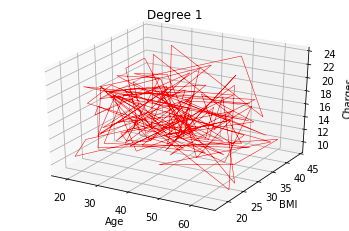

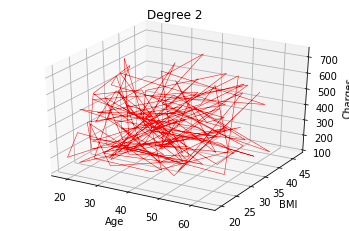

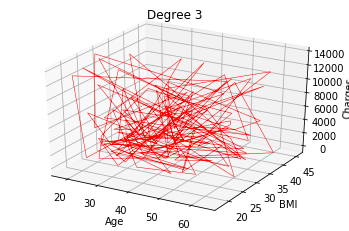

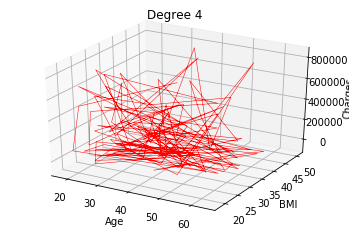

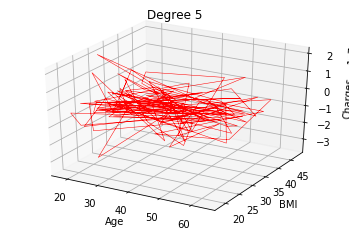

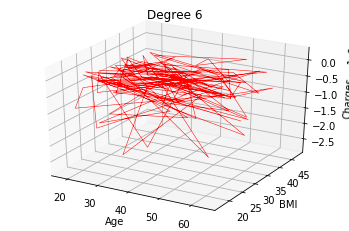

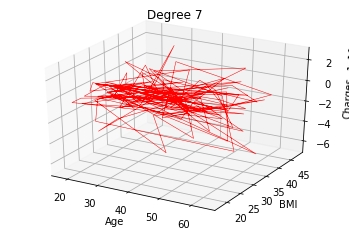

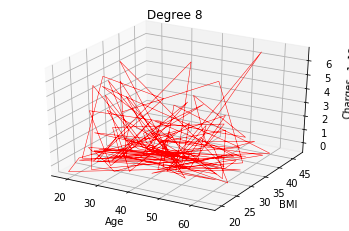

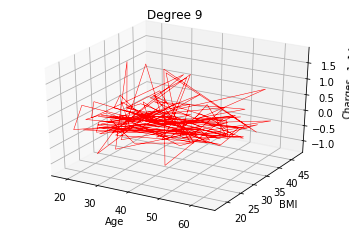

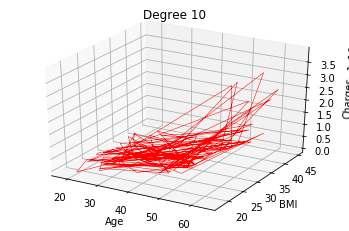

In [479]:
test_data = int(0.9*len(data))
x = ds[test_data:, 0:2]
x1 = ds[test_data:, 0]
x2 = ds[test_data:, 1]

for i in degrees:
    wGD, cGD_valid, cGD_test = gradientD(i, 0, 0, 1000, False)
    poly = PolynomialFeatures(i)
    x_poly = poly.fit_transform(x)
    y_pred = x_poly@wGD
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('Age')
    ax.set_ylabel('BMI')
    ax.set_zlabel('Charges')
    ax.plot3D(x1, x2, y_pred, linewidth = 0.5, color = 'red')
    ax.set_title('Degree {}'.format(i));